In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc #roc_auc_curve

In [2]:
from main import *

In [3]:
df3.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,PC1990,PC1991,PC1992,PC1993,PC1994,PC1995,PC1996,PC1997,PC1998,PC1999
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,-0.000376,-0.005662,-0.000359,0.004838,-0.000920,0.001261,0.002701,0.000242,-0.000644,-0.001580
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,0.015695,-0.005086,0.024285,-0.014826,-0.016438,-0.005287,0.001115,-0.016850,0.026615,-0.001008
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,0.000089,-0.004681,-0.004071,-0.004756,-0.007465,0.004945,0.001624,-0.004462,0.005613,0.000152
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,-0.011072,-0.001298,-0.016227,0.008546,0.007750,0.008546,-0.007562,-0.004685,-0.000746,-0.009292
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,0.063728,-0.022921,0.007085,-0.025304,0.026365,0.047598,0.003196,0.034772,0.064098,0.002989


In [4]:
X = df3.drop(columns=['id_producto','label'], axis=1)
Y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [5]:
clf = LogisticRegression(solver='lbfgs') # la forma del GD
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [6]:
accuracy_score(y_test,Y_pred)

0.9513025111476179

In [7]:
Y_pred_train = clf.predict(X_train)
accuracy_score(y_train,Y_pred_train)

0.958470608635339

In [8]:
cfm = confusion_matrix(Y_pred, y_test)
cfm

array([[15026,   596],
       [  234,  1188]], dtype=int64)

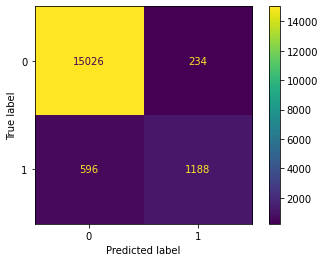

In [10]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
#plot_confusion_matrix(model_result,  X_test, y_test) funcion deprecada en futuras versiones
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [12]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9753490323187324


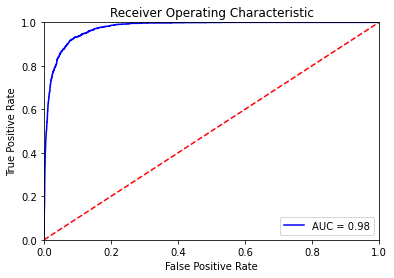

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
print(classification_report(y_test,y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15260
           1       0.84      0.67      0.74      1784

    accuracy                           0.95     17044
   macro avg       0.90      0.83      0.86     17044
weighted avg       0.95      0.95      0.95     17044

